Basic word count analysis using the code from https://medium.com/@pragya_paudyal/scraping-tweet-using-twint-and-analyzing-with-nlp-932e01ad5587

In [3]:
# Import libraries
import nest_asyncio
import pandas as pd

import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import string
nltk.download("stopwords")
stopwords = stopwords.words('english')
ps= nltk.PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
# Get data set
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CleanSenateTweets.csv')

In [7]:
# Removing punctuation 
data["tweet"]= data["tweet"].str.replace("[^a-zA-Z0–9]", " ")

In [8]:
# Tokenization
def tokenize(text):
  tokens = re.split("\W+", text)
  return tokens
data['tweet']= data['tweet'].apply (lambda x: tokenize(x.lower()))

In [9]:
# Removing stopwords
def remove_stopword(text):
  text_nostopword= [char for char in text if char not in stopwords]
  return text_nostopword
data['tweet']= data['tweet'].apply(lambda x: remove_stopword(x))

In [10]:
# Stemming and Lemmatizeation 
def stem(tweet_no_stopword):
  text = [ps.stem ( word) for word in tweet_no_stopword]
  return text
data["tweet"]= data["tweet"].apply(lambda x: stem(x))

In [12]:
# Word frequency count
data_list = data.loc[:,"tweet"].to_list()

In [13]:
flat_data_list = [item for sublist in data_list for item in sublist]

In [14]:
data_count= pd.DataFrame(flat_data_list)
data_count= data_count[0].value_counts()

In [15]:
from nltk.probability import FreqDist

In [16]:
freq_count = FreqDist()
for words in data_count:
  freq_count[words] +=1
  freq_count

In [17]:
# Visualise the result
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


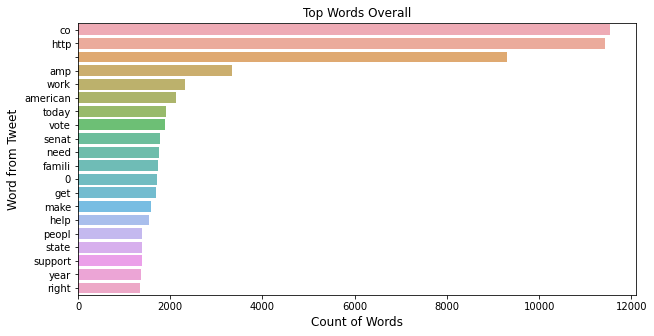

In [19]:
data_count = data_count[:20,]
plt.figure(figsize=(10,5))
sns.barplot(data_count.values, data_count.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()